In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import pathlib
import seaborn as sns

from typing import *

In [2]:
# steady_state_hamming_distance_df = pd.read_csv('../../data/no-drug-power-law-phase-transition/N5000-full/derived/hamming-distances-1749750088840.csv')
steady_state_hamming_distance_df = pd.read_csv('../../data/no-drug-power-law-phase-transition/N5000-full/derived/hamming-distances-1749753624696.csv')

In [5]:
data = steady_state_hamming_distance_df
Ks = list(np.arange(0, 37, .5))
bins = pd.IntervalIndex.from_tuples(list(zip(Ks, Ks[1:])))
data['k_bins'] = pd.cut(data['actual_connectivity'], bins=bins).apply(lambda x: x.left)
data
# binned_data = data.groupby('k_bins')#['hamming_distance'].mean().reset_index()

,expected_connectivity,actual_connectivity,gamma,hamming_distance,k_bins
0,1.0,1.000,5000.000000,0.00840,0.5
1,1.0,1.000,5000.000000,0.01040,0.5
2,1.0,1.000,5000.000000,0.00880,0.5
3,1.0,1.000,5000.000000,0.00800,0.5
4,1.0,1.000,5000.000000,0.00660,0.5
...,...,...,...,...,...
7472495,30.0,33.479,1.614403,0.20746,33.0
7472496,30.0,33.479,1.614403,0.20218,33.0
7472497,30.0,33.479,1.614403,0.20232,33.0
7472498,30.0,33.479,1.614403,0.20588,33.0


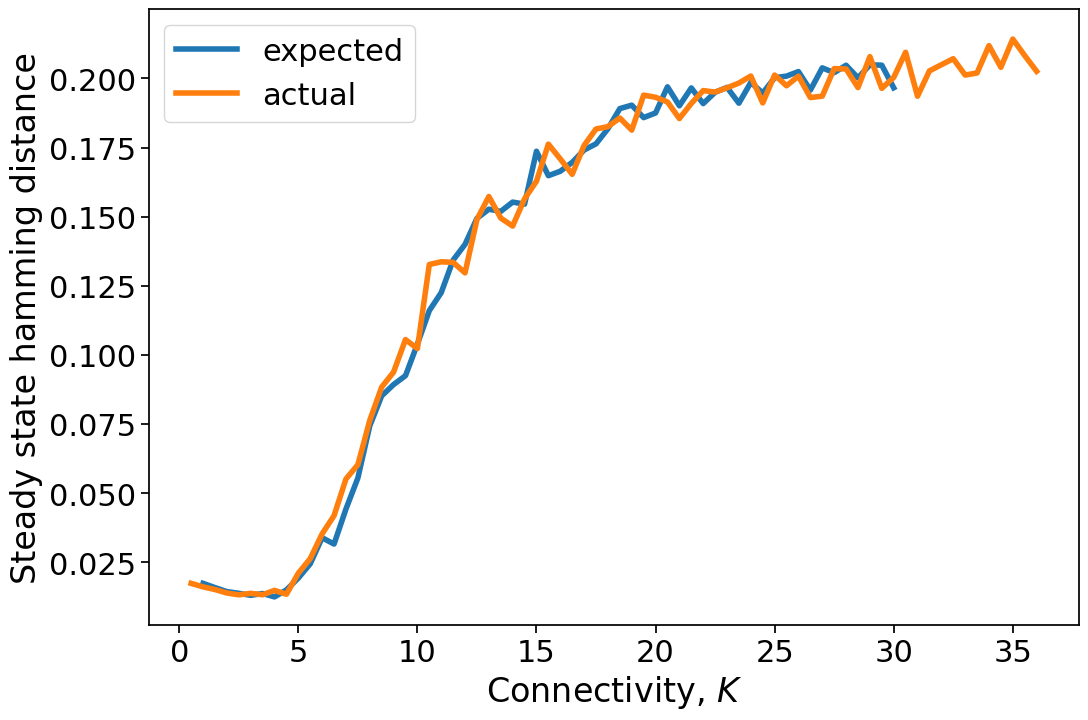

In [7]:
with sns.plotting_context('notebook', font_scale=2.0):
  fig, ax = plt.subplots(figsize=(12, 8))
  g = sns.lineplot(
    data=steady_state_hamming_distance_df,
    x='expected_connectivity',
    y='hamming_distance',
    legend=True,
    label='expected',
    lw=4,
    ax=ax,
  )
  sns.lineplot(
    data=steady_state_hamming_distance_df,
    x='k_bins',
    y='hamming_distance',
    lw=4,
    legend=True,
    label='actual',
    ax=ax,
  )
  g.set(xlabel='Connectivity, $K$', ylabel='Steady state hamming distance')

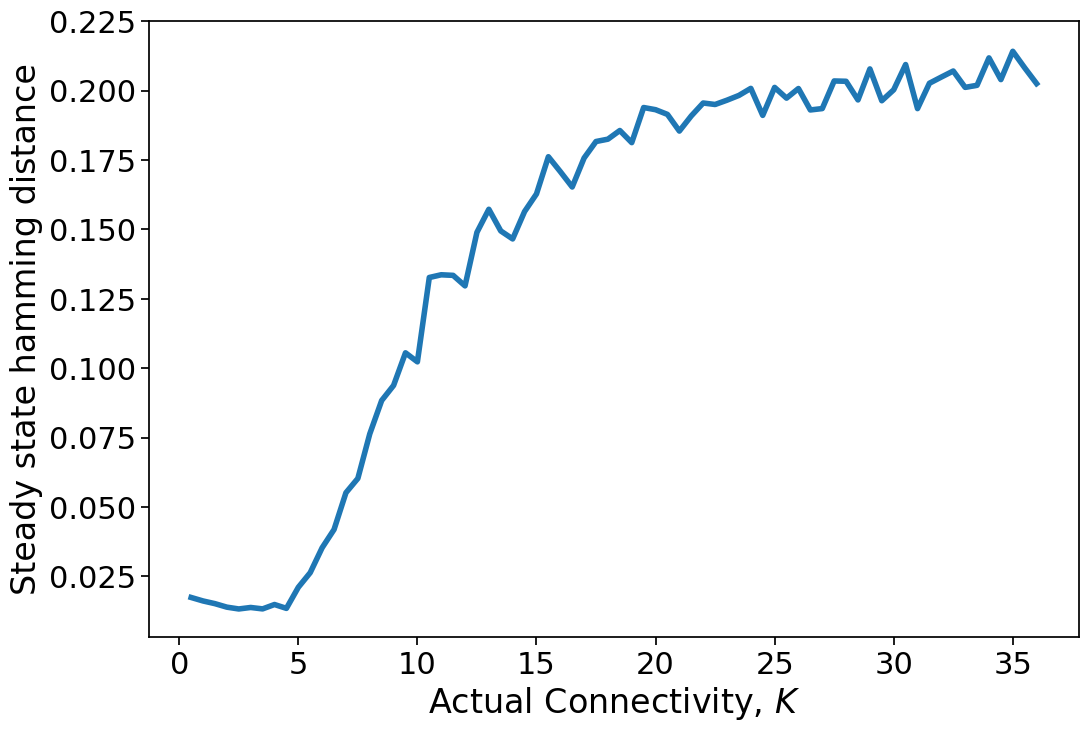

In [ ]:
# with sns.plotting_context('notebook', font_scale=2.0):
#   fig, ax = plt.subplots(figsize=(12, 8))
#   g.set(xlabel='Actual Connectivity, $K$', ylabel='Steady state hamming distance')

In [8]:
g.figure.savefig(
  '../../plots/no-drug-power-law-phase-transition-expected-vs-actual-connectivity-N5k.png',
  bbox_inches='tight',
  dpi=300,
)